Assignment - 2

Build an ANN model for Drug classification.

Task 1: Read the dataset and do data pre-processing

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df=pd.read_csv('/content/drug200.csv')

In [147]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [148]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [149]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [151]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

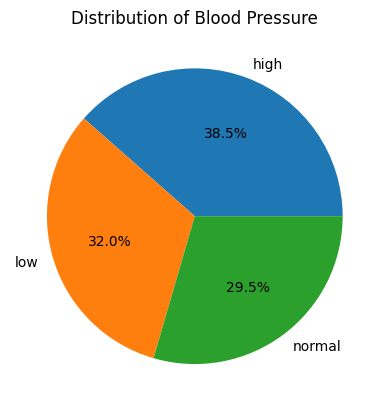

In [152]:
bp_counts = df['BP'].value_counts()
plt.pie(bp_counts, labels=['high','low','normal'],autopct='%1.1f%%')
plt.title('Distribution of Blood Pressure')
plt.show()

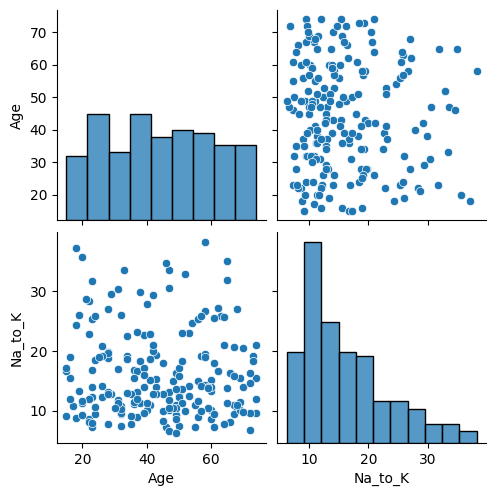

In [153]:
sns.pairplot(df)

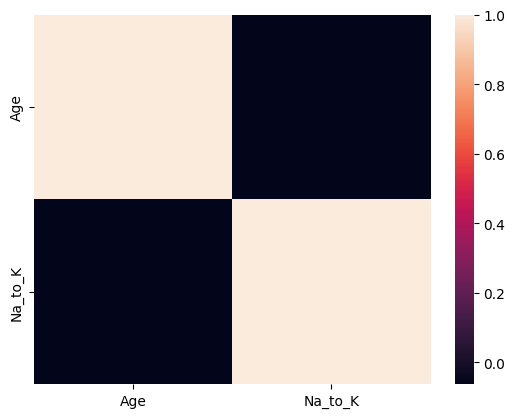

In [154]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix)
plt.show()
#sns.heatmap(df.corr())#title('HEATMAP BETWEEN Age AND Na_to_K)')

In [155]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [156]:
x=df.iloc[:,0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [157]:
y=df.iloc[:,5:]
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


SPLITTING THE DATASET INTO TRAINING AND TESTING DATA

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=12)

USING LABEL ENCODING FOR THE CATEGORICAL DATA 

In [159]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_train['Sex'] = label_encoder.fit_transform(x_train['Sex'])
x_test['Sex'] = label_encoder.transform(x_test['Sex'])

x_train['BP'] = label_encoder.fit_transform(x_train['BP'])
x_test['BP'] = label_encoder.transform(x_test['BP'])

x_train['Cholesterol'] = label_encoder.fit_transform(x_train['Cholesterol'])
x_test['Cholesterol'] = label_encoder.transform(x_test['Cholesterol'])

print('x_train')
print(x_train)
print('x_test')
print(x_test)

x_train
     Age  Sex  BP  Cholesterol  Na_to_K
77    26    0   0            1   19.161
47    68    1   1            0   10.291
94    56    1   1            0   15.015
14    50    0   2            0   12.703
41    58    0   0            1   14.239
..   ...  ...  ..          ...      ...
3     28    0   2            0    7.798
130   70    0   2            0   20.489
134   42    0   0            0   21.036
155   49    1   1            0   10.537
75    26    1   1            1   20.909

[160 rows x 5 columns]
x_test
     Age  Sex  BP  Cholesterol  Na_to_K
23    48    0   1            0   15.036
182   20    0   1            1   11.686
172   39    0   2            1   17.225
21    63    1   2            0   25.917
63    45    1   1            1    8.370
11    34    0   0            1   19.199
61    24    1   0            1    9.475
32    49    1   1            1   11.014
164   16    1   0            1   19.007
7     41    1   1            0   11.037
95    36    1   1            1   11.424
1

In [160]:
y_train['Drug'] = label_encoder.fit_transform(y_train['Drug'])
y_test['Drug'] = label_encoder.transform(y_test['Drug'])
y_train

,Drug
77,0
47,3
94,0
14,4
41,2
...,...
3,4
130,0
134,0
155,3


Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

BUILDING THE ANN MODEL FOR THE DRUG CLASSIFICATION

CLASSIFICATION

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# initiizing the model
model=Sequential()
# adding the input layer
model.add(Dense(4,activation='relu'))
# adding the 1st hidden layer
model.add(Dense(64,activation='relu'))
#adding the 2nd hidden layer
model.add(Dense(32,activation='relu'))
#adding the 3rd hidden layer
model.add(Dense(16,activation='relu'))
#adding the output layer
model.add(Dense(1,activation='linear'))


In [162]:
model.compile(optimizer='adam',loss='mse')

In [163]:
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
40/40 [==============================] - 1s 2ms/step - loss: 2.9345
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 2.8137
Epoch 3/10
40/40 [==============================] - 0s 2ms/step - loss: 2.9081
Epoch 4/10
40/40 [==============================] - 0s 2ms/step - loss: 2.8415
Epoch 5/10
40/40 [==============================] - 0s 2ms/step - loss: 2.8157
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 2.7958
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 2.7427
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 2.7166
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 2.7005
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 2.6883


TESTING THE MODEL

In [164]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


COMPARING ACTUAL AND PREDICTED VALUES

In [165]:
comp=pd.DataFrame(y_test)
comp.columns=['Actual value']
comp['predicted value'] = y_pred
comp

,Actual value,predicted value
23,0,1.703411
182,4,0.583398
172,0,1.209243
21,0,1.836030
63,4,1.826079
11,0,0.783792
61,1,0.777144
32,4,1.872952
164,0,0.058768
7,3,1.544182


TESTING THE MODEL WITH RANDOM DATA

In [166]:
model.predict([[20,1,2,2,7.7]])

1/1 [==============================] - 0s 148ms/step


array([[0.7572585]], dtype=float32)

CLASSIFICATION

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [169]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [170]:
x1=pd.get_dummies(df.iloc[:,1:5]).values
x1

array([[25.355,  1.   ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [13.093,  0.   ,  1.   , ...,  0.   ,  1.   ,  0.   ],
       [10.114,  0.   ,  1.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 9.894,  0.   ,  1.   , ...,  1.   ,  1.   ,  0.   ],
       [14.02 ,  0.   ,  1.   , ...,  1.   ,  0.   ,  1.   ],
       [11.349,  1.   ,  0.   , ...,  0.   ,  0.   ,  1.   ]])

In [171]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [172]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

df['BP']=le.fit_transform(df['BP'])

df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [173]:
x1 = pd.get_dummies(df.iloc[:,1:5]).values
x1

array([[ 0.   ,  0.   ,  0.   , 25.355],
       [ 1.   ,  1.   ,  0.   , 13.093],
       [ 1.   ,  1.   ,  0.   , 10.114],
       [ 0.   ,  2.   ,  0.   ,  7.798],
       [ 0.   ,  1.   ,  0.   , 18.043],
       [ 0.   ,  2.   ,  0.   ,  8.607],
       [ 0.   ,  2.   ,  0.   , 16.275],
       [ 1.   ,  1.   ,  0.   , 11.037],
       [ 1.   ,  2.   ,  0.   , 15.171],
       [ 1.   ,  1.   ,  1.   , 19.368],
       [ 0.   ,  1.   ,  0.   , 11.767],
       [ 0.   ,  0.   ,  1.   , 19.199],
       [ 1.   ,  1.   ,  0.   , 15.376],
       [ 0.   ,  1.   ,  0.   , 20.942],
       [ 0.   ,  2.   ,  0.   , 12.703],
       [ 0.   ,  0.   ,  1.   , 15.516],
       [ 1.   ,  1.   ,  1.   , 11.455],
       [ 1.   ,  0.   ,  0.   , 13.972],
       [ 1.   ,  1.   ,  0.   ,  7.298],
       [ 0.   ,  0.   ,  1.   , 25.974],
       [ 1.   ,  1.   ,  1.   , 19.128],
       [ 1.   ,  2.   ,  0.   , 25.917],
       [ 1.   ,  1.   ,  1.   , 30.568],
       [ 0.   ,  1.   ,  0.   , 15.036],
       [ 0.   , 

In [174]:
y1 = pd.get_dummies(df.iloc[:,5:]).values
y1

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [175]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size=0.2, random_state=15)
x_train

array([[ 1.   ,  1.   ,  0.   , 10.291],
       [ 1.   ,  0.   ,  1.   ,  8.621],
       [ 1.   ,  1.   ,  0.   ,  8.151],
       [ 1.   ,  2.   ,  1.   ,  7.261],
       [ 0.   ,  1.   ,  1.   , 11.686],
       [ 0.   ,  0.   ,  0.   , 13.313],
       [ 0.   ,  1.   ,  0.   , 14.16 ],
       [ 0.   ,  0.   ,  1.   , 18.809],
       [ 0.   ,  1.   ,  1.   , 23.003],
       [ 0.   ,  0.   ,  0.   , 34.686],
       [ 0.   ,  2.   ,  0.   , 16.275],
       [ 1.   ,  1.   ,  1.   , 11.424],
       [ 0.   ,  0.   ,  0.   , 12.854],
       [ 1.   ,  0.   ,  0.   , 11.009],
       [ 1.   ,  0.   ,  0.   , 18.991],
       [ 0.   ,  1.   ,  1.   , 18.739],
       [ 1.   ,  0.   ,  0.   ,  9.567],
       [ 1.   ,  0.   ,  1.   , 17.069],
       [ 1.   ,  0.   ,  1.   , 10.446],
       [ 1.   ,  0.   ,  0.   ,  9.664],
       [ 0.   ,  0.   ,  0.   , 25.395],
       [ 1.   ,  1.   ,  1.   , 19.128],
       [ 0.   ,  0.   ,  0.   , 11.262],
       [ 0.   ,  0.   ,  0.   , 12.894],
       [ 0.   , 

In [176]:
#Bulid a ANN model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#intialize the sequence model
class_model=Sequential()
#adding the input layer to the model
class_model.add(Dense(5,activation='relu'))
#adding the 1st hidden layer to the model
class_model.add(Dense(64,activation='relu'))
#adding the 2nd hidden layer to the model
class_model.add(Dense(32,activation='relu'))
#adding the 3rd hidden layer to the model
class_model.add(Dense(24,activation='relu'))
#adding output layer
class_model.add(Dense(5,activation='softmax'))

In [177]:
# Compiling the skeleton with loss and gradient decent
class_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [178]:
# Training the model
class_model.fit(x_train,y_train,batch_size=4,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
40/40 [==============================] - 2s 8ms/step - loss: 1.7174 - accuracy: 0.3438 - val_loss: 1.0323 - val_accuracy: 0.4750
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 1.1644 - accuracy: 0.5063 - val_loss: 0.9669 - val_accuracy: 0.5750
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.6062 - val_loss: 0.9459 - val_accuracy: 0.5750
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 1.0421 - accuracy: 0.6313 - val_loss: 0.8928 - val_accuracy: 0.6500
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.9640 - accuracy: 0.6750 - val_loss: 0.7988 - val_accuracy: 0.7750
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.9286 - accuracy: 0.6562 - val_loss: 0.7422 - val_accuracy: 0.7250
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.8788 - accuracy: 0.6625 - val_loss: 0.7072 - val_accuracy: 0.7750
Epoch 8/10
40/40 [==

In [179]:
y_pred=class_model.predict(x_test)
print('Prediction is :\n', y_pred)

2/2 [==============================] - 0s 5ms/step
Prediction is :
 [[8.26778412e-01 9.05958787e-02 4.63094823e-02 3.03459857e-02
  5.97024104e-03]
 [2.55464017e-01 2.54697233e-01 2.61865646e-01 1.45230651e-01
  8.27425495e-02]
 [5.33205152e-01 1.75149962e-01 1.44106463e-01 9.02546048e-02
  5.72837591e-02]
 [2.40753993e-01 3.19093429e-02 2.91247945e-02 6.49735555e-02
  6.33238316e-01]
 [5.87441633e-03 5.86300157e-03 8.37598182e-03 2.25234814e-02
  9.57363009e-01]
 [7.27079332e-01 7.21413940e-02 4.73971702e-02 6.38862178e-02
  8.94959494e-02]
 [9.92413051e-03 5.55004366e-03 8.17887019e-03 2.57247929e-02
  9.50622261e-01]
 [2.12543011e-01 5.52162640e-02 5.31196408e-02 9.78387371e-02
  5.81282377e-01]
 [2.83303857e-01 2.23871365e-01 2.40937099e-01 1.25236019e-01
  1.26651660e-01]
 [8.77809644e-01 9.22154039e-02 2.49121487e-02 4.98966640e-03
  7.30370302e-05]
 [5.84240794e-01 1.68270186e-01 1.30839974e-01 7.74750933e-02
  3.91738638e-02]
 [9.15117040e-02 3.37926522e-02 3.73960771e-02 7.637